# Test sampleo dataset completo

In [1]:
import numpy as np
import meshplot as mp
from training.dataset import PointCloud
import matplotlib.pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
pc = PointCloud( '../results/juguete/juguete_hd.json', 60000, 1,[0.1, 0.1, 0.8], [0.3, 0.95])

#plt.hist( pc[0][0]['distance'].detach().cpu(), bins=np.linspace(0,1,10), density=True)
#plt.show()

Loading meshes "../results/juguete/juguete_hd.json".
Fetching 30000 on-surface points per iteration.
Creating point-cloud and acceleration structures.


In [3]:
samples, normals, sdf, curvature = next(iter(pc))
distance = np.array(samples.detach().cpu())[:, 0]
coords = np.array(samples.detach().cpu())[:, 1:]
sdf = np.array(sdf.detach().cpu()).flatten()
curvature = np.array(curvature.detach().cpu()).flatten()
submesh = np.ones_like(distance) * 0
mp.plot( coords[np.isclose(distance, submesh).flatten()], c= sdf[np.isclose(distance, submesh).flatten()], shading={'point_size':0.1, 'colormap':'turbo'} )

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-7.003545…

# Test superficie

In [ ]:
mp.plot( coords[np.isclose(sdf, submesh).flatten()], c= curvature[np.isclose(sdf, submesh).flatten()], shading={'point_size':0.1, 'colormap':'turbo'} )

a ver si hacemos un analisis un poquito más piola...

In [11]:
configuraciones = [
    [ [0.3, 0.3, 0.4], [0.3, 0.6] ], # super equilibrada
    [ [0.1, 0.8, 0.1], [0.5, 0.9]], # con enfoque en las de curvatura media
    [ [0.1, 0.1, 0.8], [0.5, 0.9]] # con enfoque en curvatura alta
]

curvaturas = []
puntos = []
for fractions, bins in configuraciones:
    pc = PointCloud( '../results/juguete/juguete_hd.json', 300, 2,fractions, bins)
    c = []
    p = []
    for samples, normals, sdf, curvature in iter(pc):
        distance = np.array(samples.detach().cpu())[:, 0]
        coords = np.array(samples.detach().cpu())[:, 1:]
        sdf = np.array(sdf.detach().cpu()).flatten()
        curvature = np.array(curvature.detach().cpu()).flatten()
        submesh = np.ones_like(distance) * 0

        if len(c) == 0:
            p = coords[np.isclose(sdf, submesh).flatten()]
            c = curvature[np.isclose(sdf, submesh).flatten()]
        else:
            c = np.concatenate( [c, curvature[np.isclose(sdf, submesh).flatten()]])
            p = np.concatenate( [p, coords[np.isclose(sdf, submesh).flatten()]])

    curvaturas.append(c)
    puntos.append(p)

Loading meshes "../results/juguete/juguete_hd.json".
Fetching 150 on-surface points per iteration.
Creating point-cloud and acceleration structures.
Loading meshes "../results/juguete/juguete_hd.json".
Fetching 150 on-surface points per iteration.
Creating point-cloud and acceleration structures.
Loading meshes "../results/juguete/juguete_hd.json".
Fetching 150 on-surface points per iteration.
Creating point-cloud and acceleration structures.


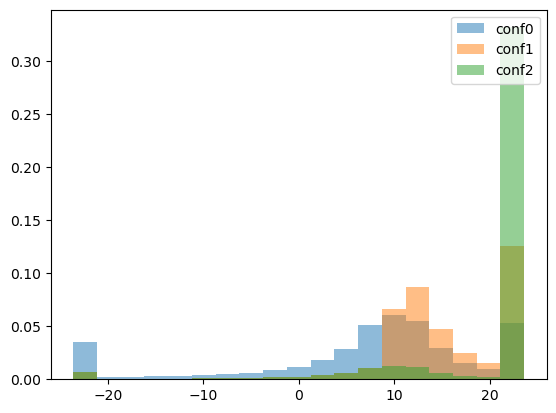

In [6]:
bins = np.linspace( np.min(curvaturas), np.max(curvaturas), 20)
plt.hist( curvaturas[0],density=True, bins=bins,alpha=0.5, label='conf0')
plt.hist( curvaturas[1],density=True, bins=bins,alpha=0.5, label='conf1')
plt.hist( curvaturas[2],density=True, bins=bins,alpha=0.5, label='conf2')
plt.legend(loc='upper right')
plt.show()

In [15]:
mp.plot( puntos[2], c= curvaturas[2], shading={'point_size':0.05, 'colormap':'turbo'} )

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.1281224…